# Tutorial 4: The truncated and shifted Lennard-Jones potential

## Physics 7810, Spring 2020

## T4.1 - Truncated and shifted Lennard-Jones potential, WCA potential

In the second homework assignment, you wrote a simple molecular dynamics (MD) simulation program for the 3D Lennard-Jones (LJ) system, using the minimum-image convention. In this tutorial, you'll modify your MD simulation code to implement a truncated and shifted LJ potential. Imposing a spherical cutoff can lead to significant speedups in the execution of MD (or MC) code, when used in conjunction with fast neighbor-search methods such as cell lists and/or Verlet neighbor lists.

In the previous tutorial, we investigated the effects of truncation on energy conservation in an MD simulation of a system of interaction particles in a central force potential. To achieve improved energy conservation in MD simulations, it's common to shift the pair potential $u(r_{ij})$ so that it's continuous at the cutoff distance $r_c$:

$$
u^\prime(r_{ij}) = \left\{
\begin{array}{ll}
u(r_{ij}) - u(r_c), & r_{ij} < r_c \\
0, & r_{ij} \geq r_c
\end{array}
\right..
$$

Note that shifting the potential doesn't change the pair forces.

Modify your LJ MD simulation code to implement a truncated and shifted pair potential. Investigate whether shifting the pair potential to be continuous at the cutoff improves energy conservation, by comparing the rms fluctuation in total energy $\langle \delta E^2 \rangle^{1/2} / \langle E \rangle$ in a simulation using the *truncated and shifted* potential $u_{\rm LJ}^\prime(r_{ij})$ with a simulation using the *truncated but unshifted* potential $u_{\rm LJ}(r_{ij})$ for a specific cutoff distance, say $r_c = 2.5 \sigma$. Note that the linear dimension of your simulation box must be at least twice the cutoff distance, $L \geq 2 r_c$.

Recall that

$$
\frac{\langle \delta E^2 \rangle^{1/2}}{\langle E \rangle} = \frac{\langle (E - \langle E \rangle)^2 \rangle^{1/2}}{\langle E \rangle},
$$

where

$$
\langle \delta E^2 \rangle = \langle (E - \langle E \rangle)^2 \rangle = \langle E^2 - 2 E \langle E \rangle + \langle E \rangle^2 \rangle
= \langle E^2 \rangle - \langle E \rangle^2.
$$

A particularly useful pair potential is obtained by truncating and shifting the LJ pair potential at a cutoff distance corresponding to its minimum, to obtain the so-called *Weeks-Chandler-Andersen* (WCA) potential. This potential is short-ranged and purely repulsive, and both the potential and the force are continuous at the cutoff.

Determine the pair separation $r_{\rm min}$ corresponding to the minimum in the LJ potential, and plot the WCA potential $u_{\rm WCA}(r)$ as a function of $r$. Implement the WCA potential in your MD code, and run a simulation using the WCA potential to test for energy conservation.

### Solution

First, we load the Python library for MD simulations, `MD_NVE.py` and the parameters for the MD simulation.

In [5]:
import sys
sys.path.insert(1, '../')  # so the system can locate the library folder
from CompPhysLib.MD_NVE import *

mdp = Initialization('Tutorial_04.yml')
MD = MolecularDynamics(mdp)

**Case 1**: Truncated but unshifted energy $u_{LJ}(r_{ij})$

RMSF:  -5.693244274516532e-05


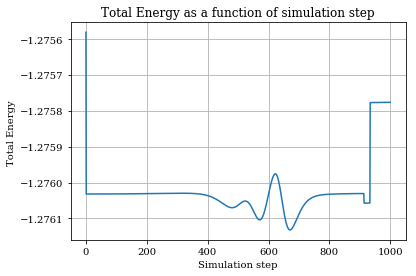

In [7]:
MD.shift_energy = 'no'
MD.verlet_integration(MD.velocities, MD.coords)
TA = TrajAnalysis(MD, 'Tutorial_04_traj.yml')
TA.plot_2d(TA.E_total, 'Total Energy')
RMSF = TA.calculate_RMSF(TA.E_total)
print('RMSF: ', RMSF)

**Case 2**: Truncated and shifted energy $u_{\rm LJ}^\prime(r_{ij})$

RMSF:  -6.166348900415688e-05


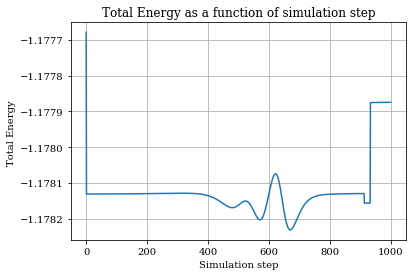

In [9]:
MD.shift_energy = 'yes'
MD.verlet_integration(MD.velocities, MD.coords)
TA = TrajAnalysis(MD, 'Tutorial_04_traj.yml')
TA.plot_2d(TA.E_total, 'Total Energy')
RMSF = TA.calculate_RMSF(TA.E_total)
print('RMSF: ', RMSF)

As shown above, 